## **DS4A_2020 | In-Depth EDA - MINJUSTICIA & CRIME RECIDIVISM IN COLOMBIA CASE STUDY**

**Business Context.**
Recidivism is a measure of a former prisoner's likelihood to be re-arrested, re-convicted, or returned to prison with or without a new sentence during a three-year period following the prisoner's release. It has been used to study the performance and effectiveness of privately and publicly managed prisons (DS4A Colombia 2.0, 2020). 

According to the report “Séptimo informe semestral del estado de seguimiento al estado de cosas Inconstitucional del Sistema Penitenciario y Carcelario” the average recidivism in Colombia in the last 7 years is 27.3%, with an upward trend. The benefits that the Colombian Ministry of Justice could derive from the identification of patterns of recidivism are linked to the development of public policies for the prevention and re-socialization of the population confined in prisons. This is an intangible benefit that acquires greater value if it is applied, for example, in detention centers for the development of programs of counseling, training and treatment of offenders (semi-customized) or if it is used as a criteria for sentence enforcement judges to assess their decisions with a greater degree of objectivity (for example the benefits of extramural detention). 

**Business Problem.**
The main objective is the “characterization of the recidivist population of the Penitentiary and Prison System in Colombia. This information is key to have inputs for the formation and monitoring of the criminal policy of the Colombian State in its phases of prevision and tertiary criminalization”. It is also important to highlight that this objective is framed in the National Plan of Criminal Policy 2019 - 2022 of the Colombian state, which has among its expected results the reduction of recidivism.

Addressing the problem of recidivism is primarily essential to prevent crime (and consequently prison overcrowding). In addition, it supports a better implementation of resocialization treatments that characterize the convicted population susceptible to recidivism, changing the focus from punishment to semi-personalized rehabilitation programs. Even more important is the increase in public security levels.

**Analytical Context.**
The main dataset is derived from a database containing records of Recidivist and Non-Recidivist individuals curated by the Ministry of Justice and Law. This database consists of different tabular datasets which were merged into a single dataset and mounted into Amazon RDS SQL database. 

The activities shown in this notebook are:

*   Load the merged dataset mounted into Amazon RDS;
*   Describe the dataset size and main columns with their raw data types;
*   Mention some insights from the dataset description;
*   Provide the main steps for pre-processing the raw dataset;
*   Conduct an in-depth EDA by exploring variables and report observed patterns related to crime and recidivism through standard tabular and graphical outputs. In addition, a network analysis is provided to explore potential groups derived from the raw dataset.
*   Conclusions and next steps





## IMPORTING LIBRARIES

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from wordcloud import WordCloud 
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## DATASET

## EXPLORATORY (INITIAL EDA)

In [ ]:
engine = create_engine('')
df = pd.read_sql('select * from reincidentes', engine)

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
#head
print(f'The input dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print('\n')
df.tail(5)

The input dataset has 365339 rows and 30 columns




,interno,delito,tentativa,agravado,calificado,fecha_ingreso,fecha_salida,fecha_captura,situacion_juridica,ano_nacimiento,edad,genero,estado_civil,pais_interno,departamento,ciudad,reincidente,estado_ingreso,actividades_trabajo,actividades_estudio,actividades_ensenanza,nivel_educativo,hijos_menores,condic_expecional,codigo_establecimiento,establecimiento,depto_establecimiento,mpio_establecimiento,regional,estado
365334,6CE23C9005393AE407B204F190D933A3B1816315,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,N,N,N,2019-05-03,None,None,CO,1990.0,29.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CESAR,TAMALAMEQUE-CESAR,1.0,Intramuros,NO,SI,NO,CICLO III,0,None,157.0,EP LAS HELICONIAS DE FLORENCIA,CAQUETA,FLORENCIA,CENTRAL,Activo
365335,505AD1B913E67F66BDCE42575BE72C002F3674A3,HURTO,N,S,S,2019-05-03,None,None,CO,1991.0,28.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CAUCA,POPAYAN-CAUCA,1.0,Intramuros,SI,NO,NO,CICLO IV,1,None,235.0,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Activo
365336,EEC41EE57204375C0DF8CDC17F575B3F09724C26,HURTO,N,N,N,2019-05-03,2019-11-15,2019-11-15,CO,1988.0,31.0,MASCULINO,None,REPUBLICA DE COLOMBIA,ARAUCA,ARAUCA-ARAUCA,1.0,Intramuros,NO,SI,NO,CICLO II,SI,None,401.0,EPMSC ARAUCA,ARAUCA,ARAUCA,ORIENTE,Baja
365337,BC36376E5010607EB30A984B210388B7010046B0,HOMICIDIO,N,N,N,2019-05-03,None,None,CO,1959.0,61.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CUNDINAMARCA,PACHO-CUNDINAMARCA,1.0,Intramuros,SI,NO,NO,CICLO II,5,None,113.0,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,BOGOTA D.C.,BOGOTA D.C.,CENTRAL,Activo
365338,38ECAF9757E85D3B60C82DD161133F1F9A708500,CONCIERTO PARA DELINQUIR,N,S,N,2019-05-03,None,None,CO,1989.0,31.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CHOCO,QUIBDO-CHOCO,1.0,Intramuros,NO,SI,NO,CICLO I,1,AFRO COLOMBIANO,502.0,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo


In [ ]:
#columns
print(f'The input datasets columns are: {df.columns.tolist()}')

The input datasets columns are: ['interno', 'delito', 'tentativa', 'agravado', 'calificado', 'fecha_ingreso', 'fecha_salida', 'fecha_captura', 'situacion_juridica', 'ano_nacimiento', 'edad', 'genero', 'estado_civil', 'pais_interno', 'departamento', 'ciudad', 'reincidente', 'estado_ingreso', 'actividades_trabajo', 'actividades_estudio', 'actividades_ensenanza', 'nivel_educativo', 'hijos_menores', 'condic_expecional', 'codigo_establecimiento', 'establecimiento', 'depto_establecimiento', 'mpio_establecimiento', 'regional', 'estado']


In [ ]:
#dtypes
df.dtypes

interno                    object
delito                     object
tentativa                  object
agravado                   object
calificado                 object
fecha_ingreso              object
fecha_salida               object
fecha_captura              object
situacion_juridica         object
ano_nacimiento            float64
edad                      float64
genero                     object
estado_civil               object
pais_interno               object
departamento               object
ciudad                     object
reincidente               float64
estado_ingreso             object
actividades_trabajo        object
actividades_estudio        object
actividades_ensenanza      object
nivel_educativo            object
hijos_menores              object
condic_expecional          object
codigo_establecimiento    float64
establecimiento            object
depto_establecimiento      object
mpio_establecimiento       object
regional                   object
estado        

From this first glimpse of the data types, we can observe all variables are stored as objects.
Therefore, it is necessary, for the preprocessing step, the transformation of features into their corresponding types & applying also downcasting method to speedup data load & processing in memory 
(e.g.: fecha_captura -> date, edad -> float16, etc.)

In [ ]:
#describe 
df.describe(include = 'object')

,interno,delito,tentativa,agravado,calificado,fecha_ingreso,fecha_salida,fecha_captura,situacion_juridica,genero,estado_civil,pais_interno,departamento,ciudad,estado_ingreso,actividades_trabajo,actividades_estudio,actividades_ensenanza,nivel_educativo,hijos_menores,condic_expecional,establecimiento,depto_establecimiento,mpio_establecimiento,regional,estado
count,365339,365339,365339,365339,365339,365339,318622,318622,365339,365339,76562,356011,365331,365339,365287,365339,365339,365339,365339,365339,31251,365339,358892,358892,365339,365339
unique,246031,321,2,2,2,3788,3765,3765,1,2,8,71,657,2491,6,2,2,2,12,24,77,160,29,122,6,2
top,C72340BA10058948D7502977EBD24271FE13FFBC,HURTO,N,N,N,2013-08-01,2019-08-11,2019-08-11,CO,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,ANTIOQUIA,BOGOTA DISTRITO CAPITAL,Intramuros,SI,SI,NO,CICLO II,SI,AFRO COLOMBIANO,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,ANTIOQUIA,BOGOTA D.C.,CENTRAL,Baja
freq,23,97495,344102,269614,289846,2180,303,303,365339,325323,45937,354229,58160,43391,225358,197909,241684,355467,147070,257039,11953,31228,50734,47494,124618,318310


In [ ]:
#unique values per column
for i, col in enumerate(df.columns):
  print('Column: ' ,col)
  print('Type: ' , df.dtypes.iloc[i])
  print('Valores unicos:  ' , len(df[col].unique()))
  print('NaN values: ' , df[col].isna().sum())
  print()
  print('Unique values:')
  print(df[col].value_counts())
  print()
  if (df.dtypes.iloc[i] == 'int64') |(df.dtypes.iloc[i] == 'float64'):
    print()
    print('Min: ', df[col].min() , '    Avg: ', df[col].mean() , '    Max: ' , df[col].max() )
    print()
  print('-------------------------------------------------------------')
  print()


Column:  interno
Type:  object
Valores unicos:   246031
NaN values:  0

Unique values:
C72340BA10058948D7502977EBD24271FE13FFBC    23
F0A6DB3801F271962A6ECE4758C2413FDCBAA9AE    23
8D0B78EB1B142BEA8E3B9D2DA5287A650657CA6A    19
2A7200F4FB3939FBC271C6CB333026C1C6A69B6B    17
71D8863489582B956956B3E244CF97F629E190F8    16
                                            ..
3DAFAF4F5401E0087D84E5433CC6CFE557C19F7E     1
61956D9C0FD7B5E816EA16B05C859B2A5E1F2691     1
1EBB3301A048F46A55121BF472020C0BF337630F     1
B6F64FD52A324F273EBE4234DB13F64777C74CE8     1
BE99A940E7EC6562EFDFAD78E2CA4C1A35A7268C     1
Name: interno, Length: 246031, dtype: int64

-------------------------------------------------------------

Column:  delito
Type:  object
Valores unicos:   321
NaN values:  0

Unique values:
HURTO                                                         97495
TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES                75174
FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO O MUNICIONES    37215
C

***Dataset insights***<br>


*   Recidivist = 142499 (39%), Non-recidivist = 222840 (61%)
*   Age with the highest number of convicts: 30 years old
*   Most common offense type: Robbery (Hurto)
*   Center with the largest amount of convicts: COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLITANO DE BOGOTA
*   Region with the largest amount of convicts: CENTRAL




## PREPROCESSING

***DATA TYPES TRANSFORMATIONS***

In [ ]:
# to datetime
df['fecha_captura'] = pd.to_datetime(df['fecha_captura'], format = '%Y-%m-%d')
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'], format = '%Y-%m-%d')
df['fecha_salida'] = pd.to_datetime(df['fecha_salida'], format = '%Y-%m-%d')

***DOWNCASTING***<br>
This is the process of downgrading the size of memory of the columns with float and int data type, so for the analysis and modelling process, it will be less resource-consuming

In [ ]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

df = downcast_dtypes(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365339 entries, 0 to 365338
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   interno                 365339 non-null  object        
 1   delito                  365339 non-null  object        
 2   tentativa               365339 non-null  object        
 3   agravado                365339 non-null  object        
 4   calificado              365339 non-null  object        
 5   fecha_ingreso           365339 non-null  datetime64[ns]
 6   fecha_salida            318622 non-null  datetime64[ns]
 7   fecha_captura           318622 non-null  datetime64[ns]
 8   situacion_juridica      365339 non-null  object        
 9   ano_nacimiento          365331 non-null  float32       
 10  edad                    365331 non-null  float32       
 11  genero                  365339 non-null  object        
 12  estado_civil            76562 

***DATA CLEANING***

In [ ]:
#print("__________INFORMATION__________")
#print(df.info())
print("__________MISSING VALUES_________")
print(df.isnull().sum())
print("__________NULL VALUES__________")
print(df.isna().sum())

__________MISSING VALUES_________
interno                        0
delito                         0
tentativa                      0
agravado                       0
calificado                     0
fecha_ingreso                  0
fecha_salida               46717
fecha_captura              46717
situacion_juridica             0
ano_nacimiento                 8
edad                           8
genero                         0
estado_civil              288777
pais_interno                9328
departamento                   8
ciudad                         0
reincidente                    0
estado_ingreso                52
actividades_trabajo            0
actividades_estudio            0
actividades_ensenanza          0
nivel_educativo                0
hijos_menores                  0
condic_expecional         334088
codigo_establecimiento         0
establecimiento                0
depto_establecimiento       6447
mpio_establecimiento        6447
regional                       0
estado   

***TEXT FORMATING***<br>
In the first EDA, it was perceived that some unique values from certain columns are repeated, but with different grammar, so it is necessary to standardize this text values 

***DATASET SPLIT ACCORDING TO THE REINCIDENTES COLUMN ***<br>

In [ ]:
df_si = df[df["reincidente"] == 1]
df_no = df[df["reincidente"] == 0]
print(df_si["reincidente"].value_counts())
print(df_no["reincidente"].value_counts())
df_si

1.0    142499
Name: reincidente, dtype: int64
0.0    222840
Name: reincidente, dtype: int64


,interno,delito,tentativa,agravado,calificado,fecha_ingreso,fecha_salida,fecha_captura,situacion_juridica,ano_nacimiento,edad,genero,estado_civil,pais_interno,departamento,ciudad,reincidente,estado_ingreso,actividades_trabajo,actividades_estudio,actividades_ensenanza,nivel_educativo,hijos_menores,condic_expecional,codigo_establecimiento,establecimiento,depto_establecimiento,mpio_establecimiento,regional,estado
0,38ECAF9757E85D3B60C82DD161133F1F9A708500,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,N,N,N,2019-05-03,NaT,NaT,CO,1989.0,31.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CHOCO,QUIBDO-CHOCO,1.0,Intramuros,NO,SI,NO,CICLO I,1,AFRO COLOMBIANO,502.0,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo
1,D5054148E0E65A278F3454FA20034C2ECFCBDD49,HURTO,N,S,S,2019-05-03,NaT,NaT,CO,1977.0,42.0,MASCULINO,SOLTERO(A),REPUBLICA DE COLOMBIA,BOGOTA DISTRITO CAPITAL,BOGOTA DISTRITO CAPITAL,1.0,Intramuros,NO,SI,NO,CICLO II,1,None,113.0,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,BOGOTA D.C.,BOGOTA D.C.,CENTRAL,Activo
2,1EDFE937DF87762837784DE2892275D87615C37A,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,N,N,N,2019-05-03,2019-07-11,2019-07-11,CO,1993.0,27.0,MASCULINO,None,REPUBLICA DE COLOMBIA,VALLE DEL CAUCA,SANTIAGO DE CALI-VALLE DEL CAUCA,1.0,Intramuros,SI,SI,NO,CICLO IV,SI,AFRO COLOMBIANO,238.0,EPMSC CARTAGO,VALLE DEL CAUCA,CARTAGO,OCCIDENTE,Baja
3,19A01DA5A6C0B1B54D18A8B1364D15E9A5CE1F57,HOMICIDIO,N,N,N,2019-05-03,NaT,NaT,CO,1983.0,36.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,LA GUAJIRA,URUMITA-LA GUAJIRA,1.0,Intramuros,SI,NO,NO,CICLO II,6,AFRO COLOMBIANO,143.0,EPMSC FLORENCIA,CAQUETA,FLORENCIA,CENTRAL,Activo
4,48B7C477289860D90BF9FE69B0A54281435D1496,"FABRICACIîN, TRçFICO, PORTE O TENENCIA DE ARMA...",N,N,N,2019-05-03,NaT,NaT,CO,1991.0,28.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,ANTIOQUIA,MEDELLIN-ANTIOQUIA,1.0,Intramuros,NO,NO,NO,CICLO I,1,None,502.0,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365334,6CE23C9005393AE407B204F190D933A3B1816315,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,N,N,N,2019-05-03,NaT,NaT,CO,1990.0,29.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CESAR,TAMALAMEQUE-CESAR,1.0,Intramuros,NO,SI,NO,CICLO III,0,None,157.0,EP LAS HELICONIAS DE FLORENCIA,CAQUETA,FLORENCIA,CENTRAL,Activo
365335,505AD1B913E67F66BDCE42575BE72C002F3674A3,HURTO,N,S,S,2019-05-03,NaT,NaT,CO,1991.0,28.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CAUCA,POPAYAN-CAUCA,1.0,Intramuros,SI,NO,NO,CICLO IV,1,None,235.0,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Activo
365336,EEC41EE57204375C0DF8CDC17F575B3F09724C26,HURTO,N,N,N,2019-05-03,2019-11-15,2019-11-15,CO,1988.0,31.0,MASCULINO,None,REPUBLICA DE COLOMBIA,ARAUCA,ARAUCA-ARAUCA,1.0,Intramuros,NO,SI,NO,CICLO II,SI,None,401.0,EPMSC ARAUCA,ARAUCA,ARAUCA,ORIENTE,Baja
365337,BC36376E5010607EB30A984B210388B7010046B0,HOMICIDIO,N,N,N,2019-05-03,NaT,NaT,CO,1959.0,61.0,MASCULINO,UNION LIBRE,REPUBLICA DE COLOMBIA,CUNDINAMARCA,PACHO-CUNDINAMARCA,1.0,Intramuros,SI,NO,NO,CICLO II,5,None,113.0,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,BOGOTA D.C.,BOGOTA D.C.,CENTRAL,Activo


## STATS

In [ ]:
def stats_df(df): #function to create stats over target columns
  age_stats = df['edad'].describe()
  intern_stats = df.groupby(['interno'])['delito'].count().describe()

  merged_df = pd.concat([age_stats,intern_stats],axis=1) 
  merged_df.columns = ['Age', 'Total offenses per individual']

  return merged_df.T

In [ ]:
df_si_stats = stats_df(df[df["reincidente"] == 1])
df_si_stats

,count,mean,std,min,25%,50%,75%,max
Age,142499.0,37.325302,9.925837,19.0,30.0,35.0,42.0,94.0
Total offenses per individual,78683.0,1.811052,1.080983,1.0,1.0,1.0,2.0,16.0


**Intepretation.**
For the population of convicts who re-offended, the average age is 37±10 years old. The average number of offenses per invididual equals to 1.8±1.1.

In [ ]:
df_no_stats = stats_df(df[df["reincidente"] == 0])
df_no_stats

,count,mean,std,min,25%,50%,75%,max
Age,222832.0,39.535305,11.852253,18.0,30.0,38.0,47.0,100.0
Total offenses per individual,173714.0,1.282798,0.692284,1.0,1.0,1.0,1.0,23.0


**Intepretation.**
For the population of convicts who re-offended, the average age is 39±12 years old. The average number of offenses per invididual equals to 1.2±0.7.

In [ ]:
df_all_stats = stats_df(df)
df_all_stats

,count,mean,std,min,25%,50%,75%,max
Age,365331.0,38.673283,11.188314,18.0,30.0,37.0,45.0,100.0
Total offenses per individual,246031.0,1.484931,0.907635,1.0,1.0,1.0,2.0,23.0


**Intepretation.**
For the whole population of convicts, the average age is 39±11 years old. The average number of offenses per invididual equals to 1.5±0.9.

## VISUALIZATIONS

***Density plots***

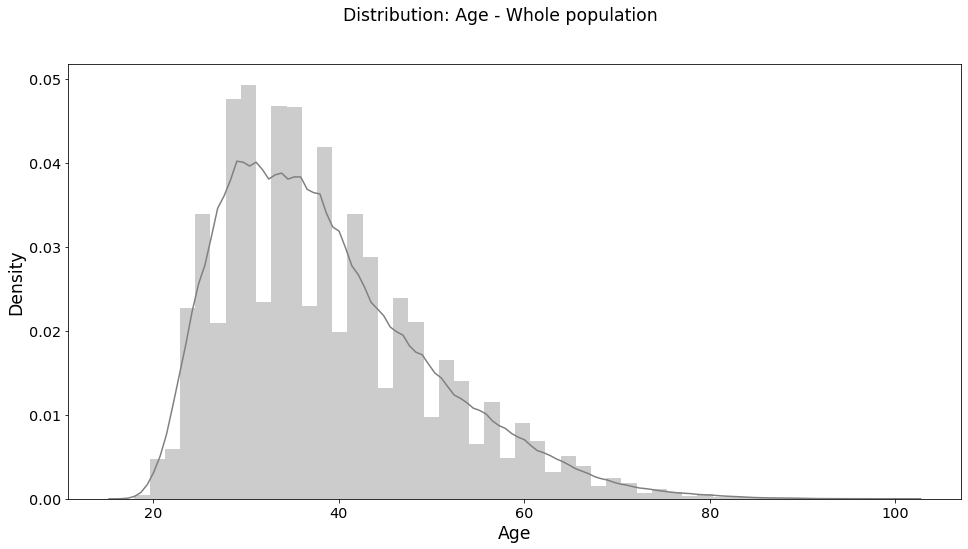

In [ ]:
#Distribution: Age  - Whole population
fig, ax = plt.subplots(figsize=(16, 8))

sns.distplot(df["edad"], color='gray')
plt.suptitle('Distribution: Age - Whole population', size='xx-large')
plt.xlabel('Age', size='xx-large')
plt.ylabel('Density', size='xx-large')

plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

plt.show()

**Intepretation.**
Most of convicts in Colombia are between 25 to 40 years old.

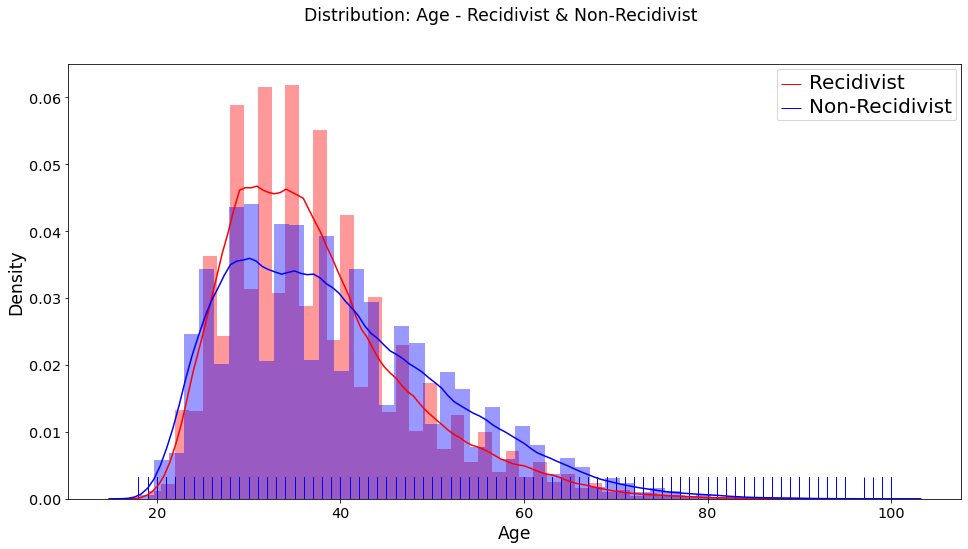

In [ ]:
#Distribution: Age recividism & non-recidivism
fig, ax = plt.subplots(figsize=(16, 8))

sns.distplot(df_si[['edad']], hist=True, rug=True, color='r')
sns.distplot(df_no[['edad']], hist=True, rug=True, color='b')
plt.legend(labels=['Recidivist','Non-Recidivist'], loc='upper right')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20')
plt.suptitle('Distribution: Age - Recidivist & Non-Recidivist', size='xx-large')
plt.xlabel('Age', size='xx-large')
plt.ylabel('Density', size='xx-large')

plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

plt.show()

**Intepretation.**
The convicted criminals who returned to prison tend to be more concetrated in the adulthood (27- 59 years) life cycle stage than population without recidivism.

***Bar plots***

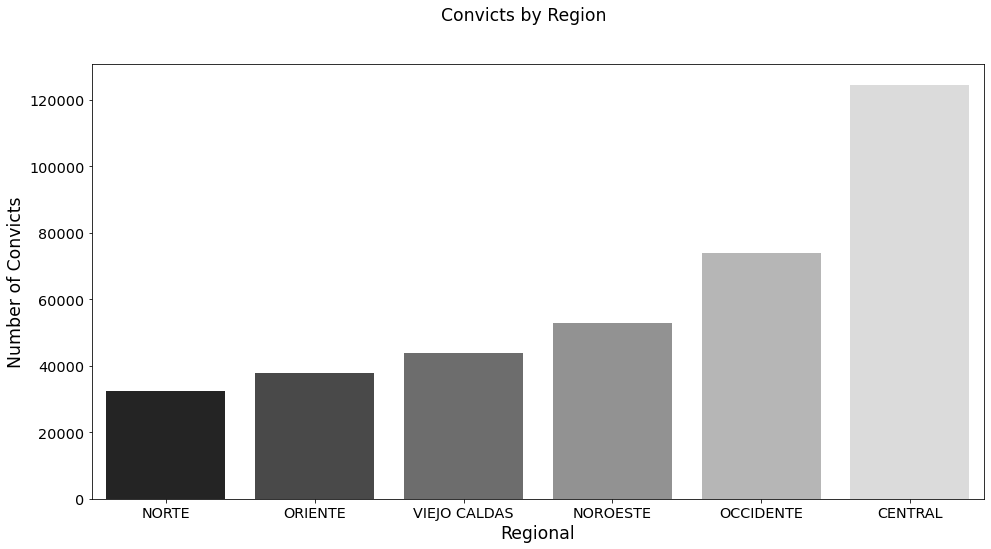

In [ ]:
df_regions = df.groupby(["regional"]).count().reset_index(drop=False)

fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(data=df_regions.sort_values(by='interno'), x="regional", y="interno", palette='gray')
plt.xlabel('Regional', size='xx-large')
plt.ylabel('Number of Convicts', size='xx-large')
plt.suptitle('Convicts by Region', size='xx-large')
plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

plt.show()

**Intepretation.**
Most of convicted criminals are located in the Central region followed by the West (Occidente) region. 

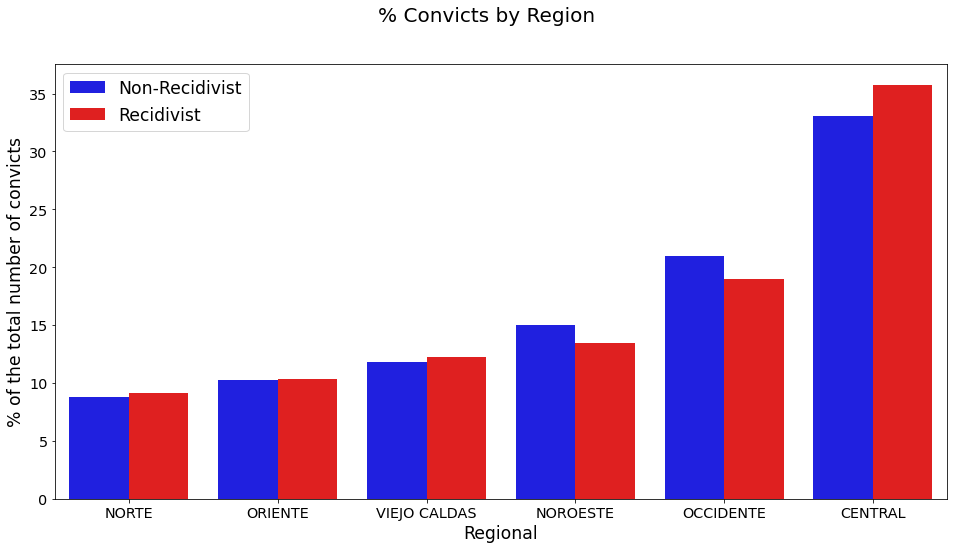

In [ ]:
groups_counts = (df.groupby(['reincidente'])['regional']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('regional'))

fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x="regional", y="Percentage", hue="reincidente", 
                 data=groups_counts.sort_values(by='Percentage'), 
                 palette=['blue','red'])
_ = plt.setp(ax.get_xticklabels(), rotation=0) 
legend = ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(0, 0, 1, 1),title='', prop=dict(size='xx-large'))
legend.get_texts()[0].set_text('Non-Recidivist')
legend.get_texts()[1].set_text('Recidivist')

plt.xlabel('Regional', size='xx-large')
plt.ylabel('% of the total number of convicts', size='xx-large')
plt.suptitle('% Convicts by Region', size = 20)
plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

plt.show()


**Intepretation.**
When the regions are observed by the target groups, the recividism convicts shared a higher proportion in the North, East, Viejo caldas and Central region than convicts without recividism. Only in two out of seven regions, the convicts without recividism have a higher proportion according to the total number of convicts.

***Box plots***

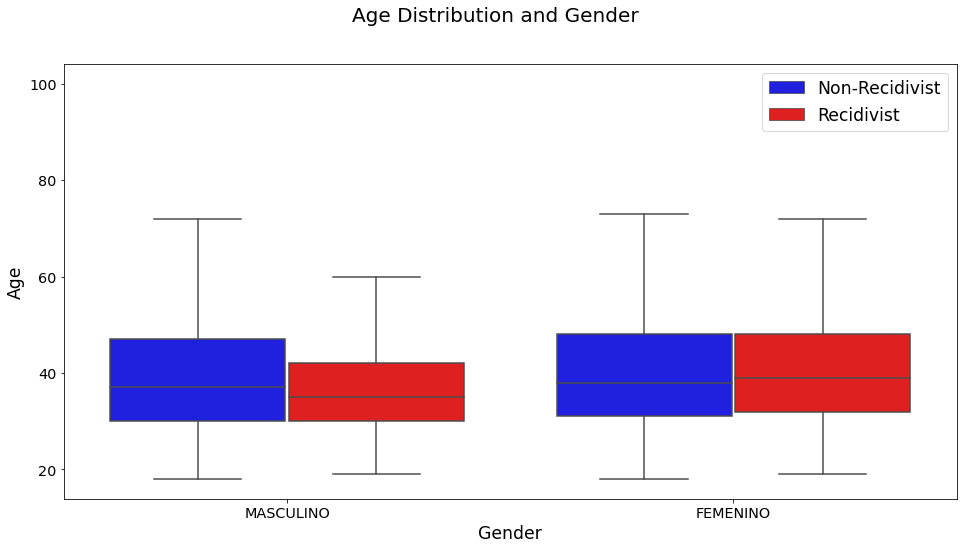

In [ ]:
#Age and Gender
fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.boxplot(x="genero", y="edad", data=df, hue="reincidente", 
                 fliersize=0, palette=['blue','red'])

legend = ax.legend(loc='upper right', ncol=1, bbox_to_anchor=(0, 0, 1, 1),title='', prop=dict(size='xx-large'))
legend.get_texts()[0].set_text('Non-Recidivist')
legend.get_texts()[1].set_text('Recidivist')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

plt.xlabel("Gender", size='xx-large')
plt.ylabel("Age", size='xx-large')
plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

plt.suptitle('Age Distribution and Gender', size = 20)
plt.show()

**Intepretation.**
The male population of convicted criminal who reoffends (recividists) tend to be younger (in term of the median) that offenders without recidivism. This is not the case for the female convicts due to both groups, recividist and non-recividist, have a similar variation and median values.

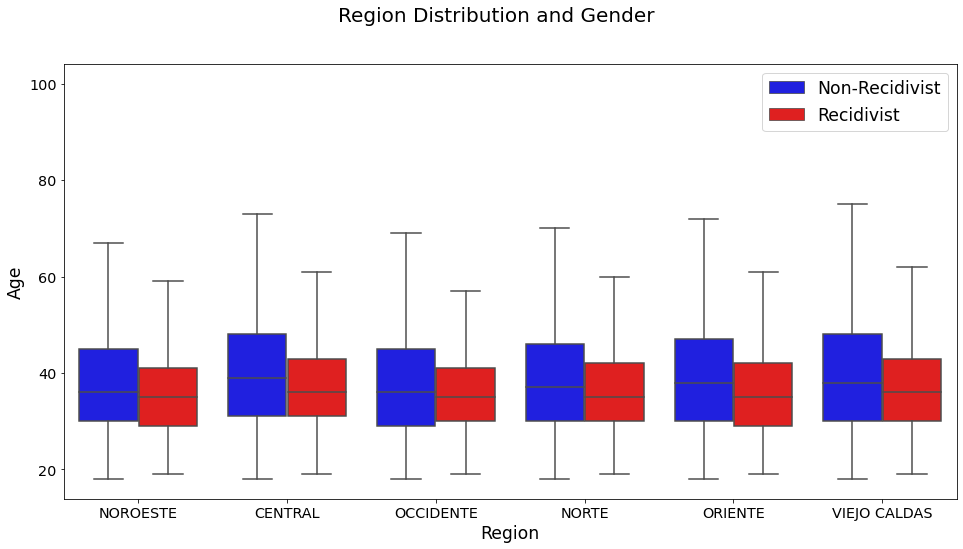

In [ ]:
#Age and Gender
fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.boxplot(x="regional", y="edad", data=df, hue="reincidente", 
                 fliersize=0, palette=['blue','red'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

legend = ax.legend(loc='upper right', ncol=1, bbox_to_anchor=(0, 0, 1, 1),title='', prop=dict(size='xx-large'))
legend.get_texts()[0].set_text('Non-Recidivist')
legend.get_texts()[1].set_text('Recidivist')

plt.xlabel("Region", size='xx-large')
plt.ylabel("Age", size='xx-large')
plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

plt.suptitle('Region Distribution and Gender', size = 20)
plt.show()

**Intepretation.**
Overall, irrespective of the region, the population of convicted criminal who reoffends (recividists) tend to be younger (in term of the median) that offenders without recidivism. 



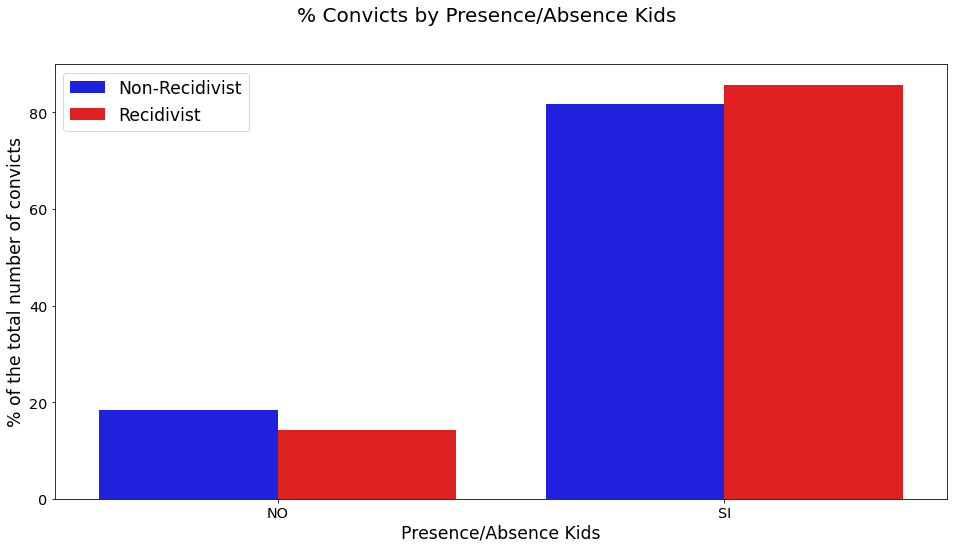

In [ ]:
##relationship betweemn the convict and presence/absence kids
df['hijos_menores'] = [x if x in ['SI','NO'] else 'NO' if x == 0 else 'SI' for x in df['hijos_menores']]

groups_counts = (df.groupby(['reincidente'])['hijos_menores']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('hijos_menores'))

fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x="hijos_menores", y="Percentage", hue="reincidente", 
                 data=groups_counts.sort_values(by='Percentage'), 
                 palette=['blue','red'])
_ = plt.setp(ax.get_xticklabels(), rotation=0) 
legend = ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(0, 0, 1, 1),title='', prop=dict(size='xx-large'))
legend.get_texts()[0].set_text('Non-Recidivist')
legend.get_texts()[1].set_text('Recidivist')

plt.xlabel('Presence/Absence Kids', size='xx-large')
plt.ylabel('% of the total number of convicts', size='xx-large')
plt.suptitle('% Convicts by Presence/Absence Kids', size = 20)
plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

plt.show()

**Intepretation.**
There is not a difference in the presence/absence of kids related to the convicted criminals who returned to prison and the population without recidivism.


In [ ]:
#sentence length (not all records have the leaving date and some offenders have multiple offense types associated)
df['sentence_length'] = df['fecha_salida'] - df['fecha_ingreso']
target_df = df[df['fecha_salida'].notnull()]

target_df['sentence_length_int'] = target_df['sentence_length'].values.astype(np.int64)

target_df_uniqueID = target_df.groupby('interno').mean()
target_df_uniqueID['sentence_length'] = pd.to_timedelta(target_df_uniqueID['sentence_length_int'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


The number of instances are 227496




(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text major ticklabel objects>)

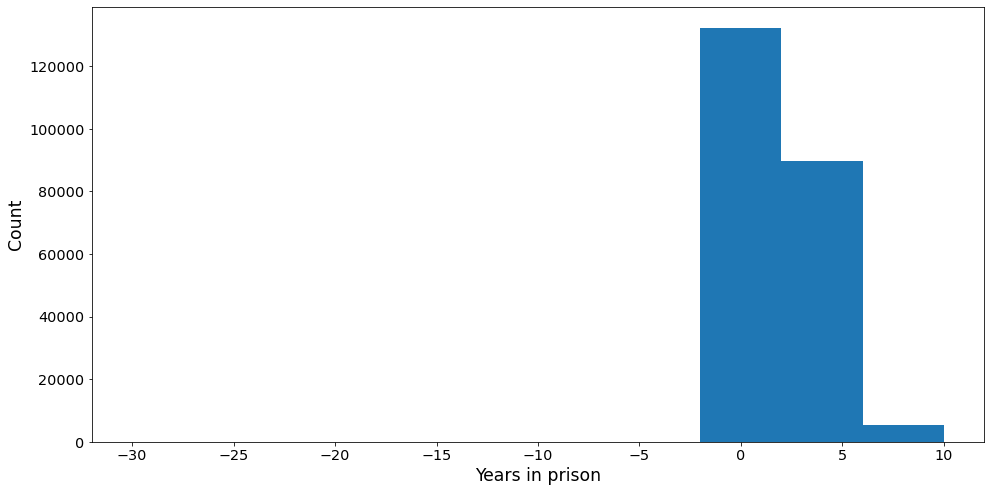

In [ ]:
#plot all
print(f'The number of instances are {target_df_uniqueID.sentence_length.shape[0]}')
print('\n')

fig, ax = plt.subplots(figsize=(16, 8))

target_df_uniqueID['sentence_length'].astype('timedelta64[Y]').plot.hist()

plt.xlabel("Years in prison", size='xx-large')
plt.ylabel("Count", size='xx-large')
plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

In [ ]:
#number of observations with negative delta
target_df_uniqueID[target_df_uniqueID['sentence_length'] < pd.Timedelta(0)].shape[0]

8478

**Intepretation.** There are some records producing negative deltas. These records (n=11370) might represent human-related errors in the annotations of the entry and leaving date.

The number of instances meeting the condition are 218418




(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text major ticklabel objects>)

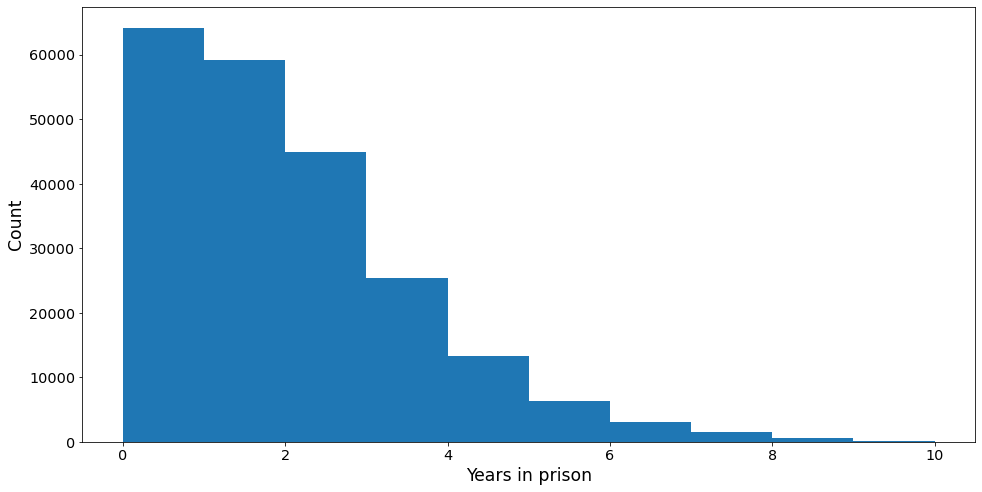

In [ ]:
#discarding negative deltas
print(f'The number of instances meeting the condition are {target_df_uniqueID[target_df_uniqueID.sentence_length > pd.Timedelta(0)].sentence_length.shape[0]}')
print('\n')

fig, ax = plt.subplots(figsize=(16, 8))

target_df_uniqueID[target_df_uniqueID['sentence_length'] > pd.Timedelta(0)]['sentence_length'].astype('timedelta64[Y]').plot.hist()

plt.xlabel("Years in prison", size='xx-large')
plt.ylabel("Count", size='xx-large')
plt.xticks(fontsize='x-large', rotation=0)
plt.yticks(fontsize='x-large', rotation=0)

In [ ]:
#number of observations with negative delta
target_df_uniqueID[target_df_uniqueID['sentence_length'] > pd.Timedelta(0)].shape[0]

218418

**Intepretation.** By removing the negative deltas, the observed records (n=218418) show most of convicts stay in prison between 1 to 3 years.

***Wordcloud***

In [ ]:
def wordcloud_crime(df, rec_class):
    df_filter = df[df["reincidente"]==rec_class]
    text = ' '.join(df_filter['delito'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

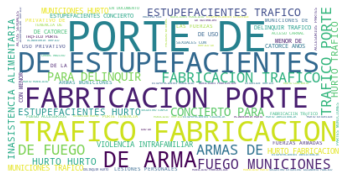

In [ ]:
#Non-Recidivist offenses
wordcloud_crime(df, 0.0)

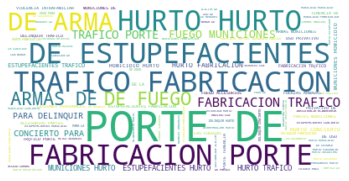

In [ ]:
#Recidivist offenses
wordcloud_crime(df, 1.0)

**Intepretation.** There is not a clear pattern to differenciate the most common offense types in Recidivist vs Non-Recidivist.

***Temporal***

In [ ]:
#functions
def plot_time( df, time_var, title, rot = 0):
    res = df.groupby([time_var])['interno'].count().reset_index(name="count")
    p = res.plot(x = time_var, y = "count", title = title, rot = rot)
    return p

def group_plot(df, period):
  for c in target_columns:

    newcol = period + '_' + c 

    if period == 'year':
      df[newcol] = df[c].dt.year
    else:
      df[newcol] = df[c].dt.month

    p_monthly = plot_time( df, newcol, f"2010-2019 {newcol} patterns")

    plt.xlabel(period, size='xx-large')
    plt.ylabel("Number of convicts", size='xx-large')
    plt.xticks(fontsize='x-large', rotation=0)
    plt.yticks(fontsize='x-large', rotation=0)

In [ ]:
target_columns = ['fecha_ingreso','fecha_salida']

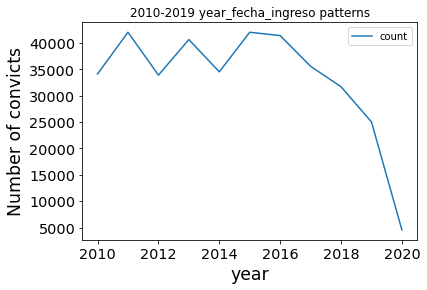

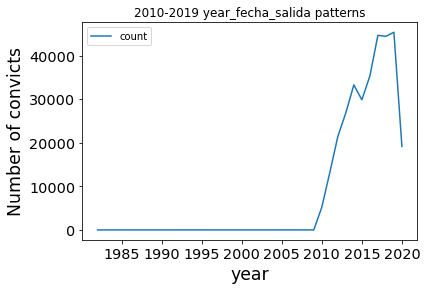

In [ ]:
group_plot(df, 'year')

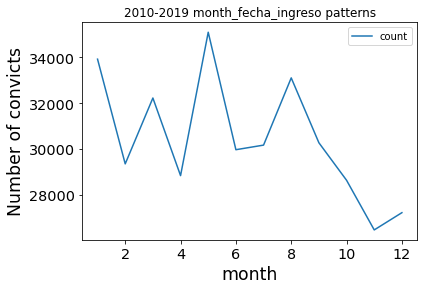

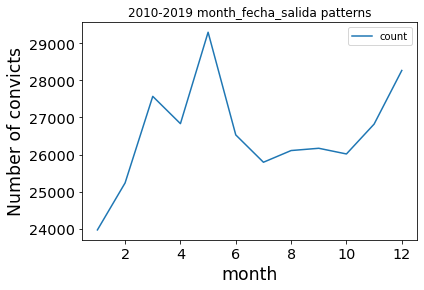

In [ ]:
#monthly entry point
group_plot(df, 'month')

**Network analysis**

Using the identifiers from criminals we can perform some network analysis to detect which crimes are more similar and, with what probability, we can expect recividism based on the past history of our observations. With recurring crimes we can draw a general profile and even perform some cluster analysis to detect similar crimes, even subsetting by region, gender or age range among othe characteristics.

In [ ]:
recidivists_df = pd.read_sql('select * from reincidentes where reincidente = 1', engine)

After importing the data, we can begin by creating an incidence matrix. This object displays the amount of crime combinations that 

In [ ]:
col_list = ['interno', 'delito_x', 'delito_y', 'fecha_ingreso_x', 'fecha_ingreso_y']
df_merge = recidivists_df.merge(recidivists_df, on='interno')
df_merge_no_rep = df_merge[df_merge['fecha_ingreso_x'] < df_merge['fecha_ingreso_y']][col_list].drop_duplicates()
incidence_df = pd.crosstab(df_merge_no_rep['delito_x'], df_merge_no_rep['delito_y'])
incidence_df

delito_y,ABANDONO DEL SERVICIO,ABIGEATO,ABORTO SIN CONSENTIMIENTO,ABUSO DE CONFIANZA,ABUSO DE FUNCION PUBLICA,ACCESO CARNAL ABUSIVO CON MENOR DE CATORCE ANOS,ACCESO CARNAL O ACTO SEXUAL ABUSIVOS CON INCAPAZ DE RESISTIR,ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR,ACCESO CARNAL VIOLENTO,ACOSO SEXUAL,ACTO SEXUAL VIOLENTO,ACTOS DE TERRORISMO,ACTOS SEXUALES CON MENOR DE CATORCE ANOS,AMENAZAS,AMENAZAS A TESTIGO,"APODERAMIENTO DE HIDROCARBUROS, SUS DERIVADOS, BIOCOMBUSTIBLES O MEZCLAS QUE LOS CONTENGAN",COHECHO POR DAR U OFRECER,COHECHO PROPIO,CONCIERTO PARA DELINQUIR,CONCUSION,CONSERVACION O FINANCIACION DE PLANTACIONES,CONSTRENIMIENTO ILEGAL,CONSTRENIMIENTO PARA DELINQUIR,CONTAMINACION AMBIENTAL,CONTRATO SIN CUMPLIMIENTO DE REQUISITOS LEGALES,CORRUPCION DE ALIMENTOS PRODUCTOS MEDICOS O MATERIAL PROFILACTICO,CORRUPCION DE MENORES,DANO EN BIEN AJENO,DANO EN OBRAS O ELEMENTOS DE LOS SERVICIOS DE COMUNICACIONES ENERGIA Y COMBUSTIBLES,DANO INFORMATICO,DANOS EN LOS RECURSOS NATURALES,DE LA CONFORMACION DE GRUPOS ARMADOS AL MARGEN DE LA LEY,DEFRAUDACION A LOS DERECHOS PATRIMONIALES DE AUTOR,DEFRAUDACION DE FLUIDOS,DEL TRAFICO DE MIGRANTES,DELITO DEL CENTINELA,"DELITOS CONTRA LA VIDA, LA INTEGRIDAD FISICA Y EMOCIONAL DE LOS ANIMALES",DEPORTACION EXPULSION TRASLADO O DESPLAZAMIENTO FORZADO DE POBLACION CIVIL,DESAPARICION FORZADA,DESERCION,...,PECULADO CULPOSO,PECULADO POR APLICACION OFICIAL DIFERENTE,PECULADO POR APROPIACION,PECULADO POR USO,PORNOGRAFIA CON MENORES,PORTE DE SUSTANCIAS,PREVARICATO POR ACCION,PREVARICATO POR OMISION,REBELION,RECEPTACION,RECEPTACION DE HIDROCARBUROS,RECLUTAMIENTO ILICITO,SECUESTRO EXTORSIVO,SECUESTRO SIMPLE,SEDICION,SIMULACION DE INVESTIDURA O CARGO,SUMINISTRO A MENOR,TENENCIA FABRICACION Y TRAFICO DE SUSTANCIAS U OBJETOS PELIGROSOS CULPOSA,TERRORISMO,TORTURA,TRAFICO DE MONEDA FALSIFICADA,TRAFICO DE SUSTANCIAS PARA PROCESAMIENTO DE NARCOTICOS,TRAFICO ELABORACION Y TENENCIA DE ELEMENTOS DESTINADOS A LA FALSIFICACION DE MONEDA,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,TRATA DE PERSONAS,"TRçFICO DE NINAS, NINOS Y ADOLESCENTES",URBANIZACION ILEGAL,USO DE DOCUMENTO FALSO,USO DE MENORES DE EDAD PARA LA COMISION DE DELITOS,USURPACION DE MARCAS Y PATENTES,USURPACIîN DE DERECHOS DE PROPIEDAD INDUSTRIAL Y DERECHOS DE OBTENTORES DE VARIEDADES VEGETALES,UTILIZACION DE MEDIOS Y METODOS DE GUERRA ILICITOS,UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS,UTILIZACION ILICITA DE EQUIPOS TRANSMISORES O RECEPTORES,UTILIZACIîN ILêCITA DE REDES DE COMUNICACIONES,VIOLACION DE DATOS PERSONALES,VIOLACION DE HABITACION AJENA,VIOLACIîN A LOS DERECHOS DE AUTOR ART. 51 LEY 44 DE 1993,VIOLENCIA CONTRA SERVIDOR PUBLICO,VIOLENCIA INTRAFAMILIAR
delito_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABUSO DE CONFIANZA,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ABUSO DE FUNCION PUBLICA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACCESO ABUSIVO A UN SISTEMA INFORMATICO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACCESO CARNAL ABUSIVO CON MENOR DE CATORCE ANOS,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ACCESO CARNAL O ACTO SEXUAL ABUSIVOS CON INCAPAZ DE RESISTIR,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
jaccard_df = pd.DataFrame(0, index=list(set(list(incidence_df.index)+list(incidence_df.index))), 
                          columns=list(set(list(incidence_df.index)+list(incidence_df.index)))).astype(float)
for i, row in enumerate(incidence_df.index):
    for j, col in enumerate(incidence_df.columns):
        if i > j:
            try:
                denom = incidence_df.loc[row][row] + incidence_df.loc[col][col] - incidence_df.loc[row][col]
                if denom != 0:
                    jaccard_df.loc[row][col] = float(incidence_df.loc[row][col])/denom
            except:
                pass

In [ ]:
jaccard_df_melt, incidence_df_melt = jaccard_df.stack().reset_index(), incidence_df.stack().reset_index()
jaccard_df_melt.columns = ['Delito 1', 'Delito 2', 'Jaccard Index']
incidence_df_melt.columns = ['Delito 1', 'Delito 2', 'Cantidad']
similarity_df = jaccard_df_melt[(jaccard_df_melt['Jaccard Index'] > 0) &
                                (jaccard_df_melt['Jaccard Index'] < 1)].merge(incidence_df_melt, 
                                                                              on=['Delito 1', 'Delito 2'])

similarity_df[similarity_df['Cantidad'] > 50].sort_values(by = 'Jaccard Index', ascending=False).head(20)

,Delito 1,Delito 2,Jaccard Index,Cantidad
425,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONCIERTO PARA DELINQUIR,0.376858,355
350,FABRICACION TRAFICO Y PORTE DE ARMAS Y MUNICI...,CONCIERTO PARA DELINQUIR,0.354978,82
358,HOMICIDIO,CONCIERTO PARA DELINQUIR,0.297297,77
166,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONCIERTO PARA DELINQUIR,0.273574,705
8,EXTORSION,CONCIERTO PARA DELINQUIR,0.256944,74
372,HOMICIDIO,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,0.146193,144
601,HURTO,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,0.108209,1624
424,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,EXTORSION,0.094787,100
214,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,HURTO,0.088141,1508
199,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,0.084931,319


In [ ]:
complete_graph = nx.from_pandas_adjacency(jaccard_df)
complete_graph.remove_nodes_from(list(nx.isolates(complete_graph)))
msp_graph = nx.algorithms.tree.mst.maximum_spanning_tree(complete_graph)

greedy_communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(msp_graph, 
                                                                                          weight='weight')


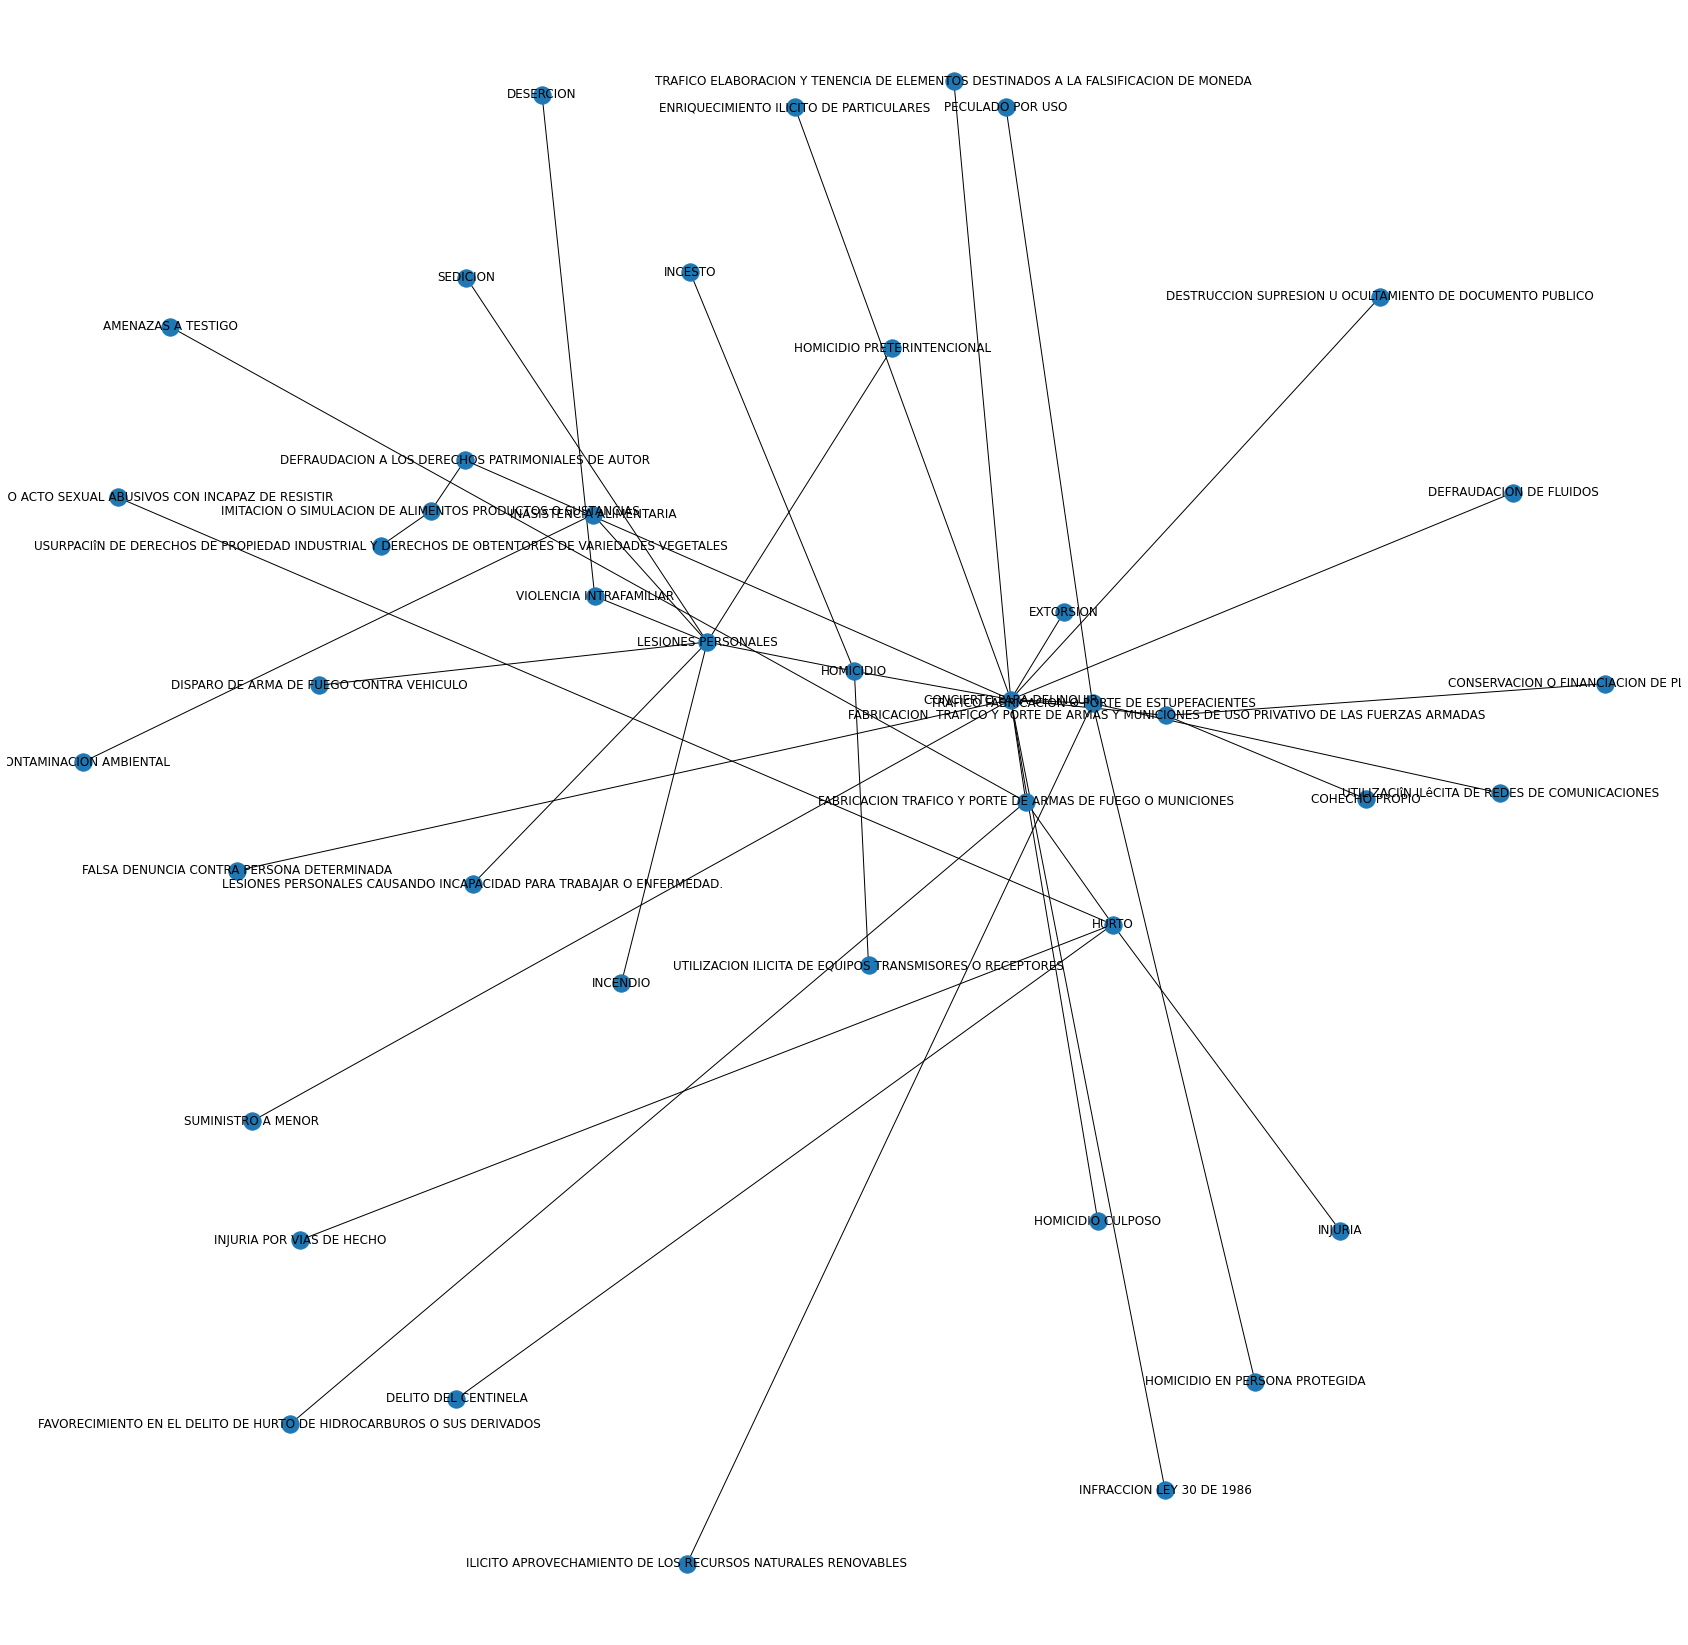

In [ ]:
community_index = 0
community = greedy_communities[community_index]
subgraph_gc = msp_graph.subgraph(community)

labels={}
for k in community:
    labels[k]=k

fig, ax = plt.subplots(figsize=(30,30))
#pos = graphviz_layout(subgraph_gc, prog='neato')
nx.draw(subgraph_gc, with_labels=True, arrows=True)
fig.show()

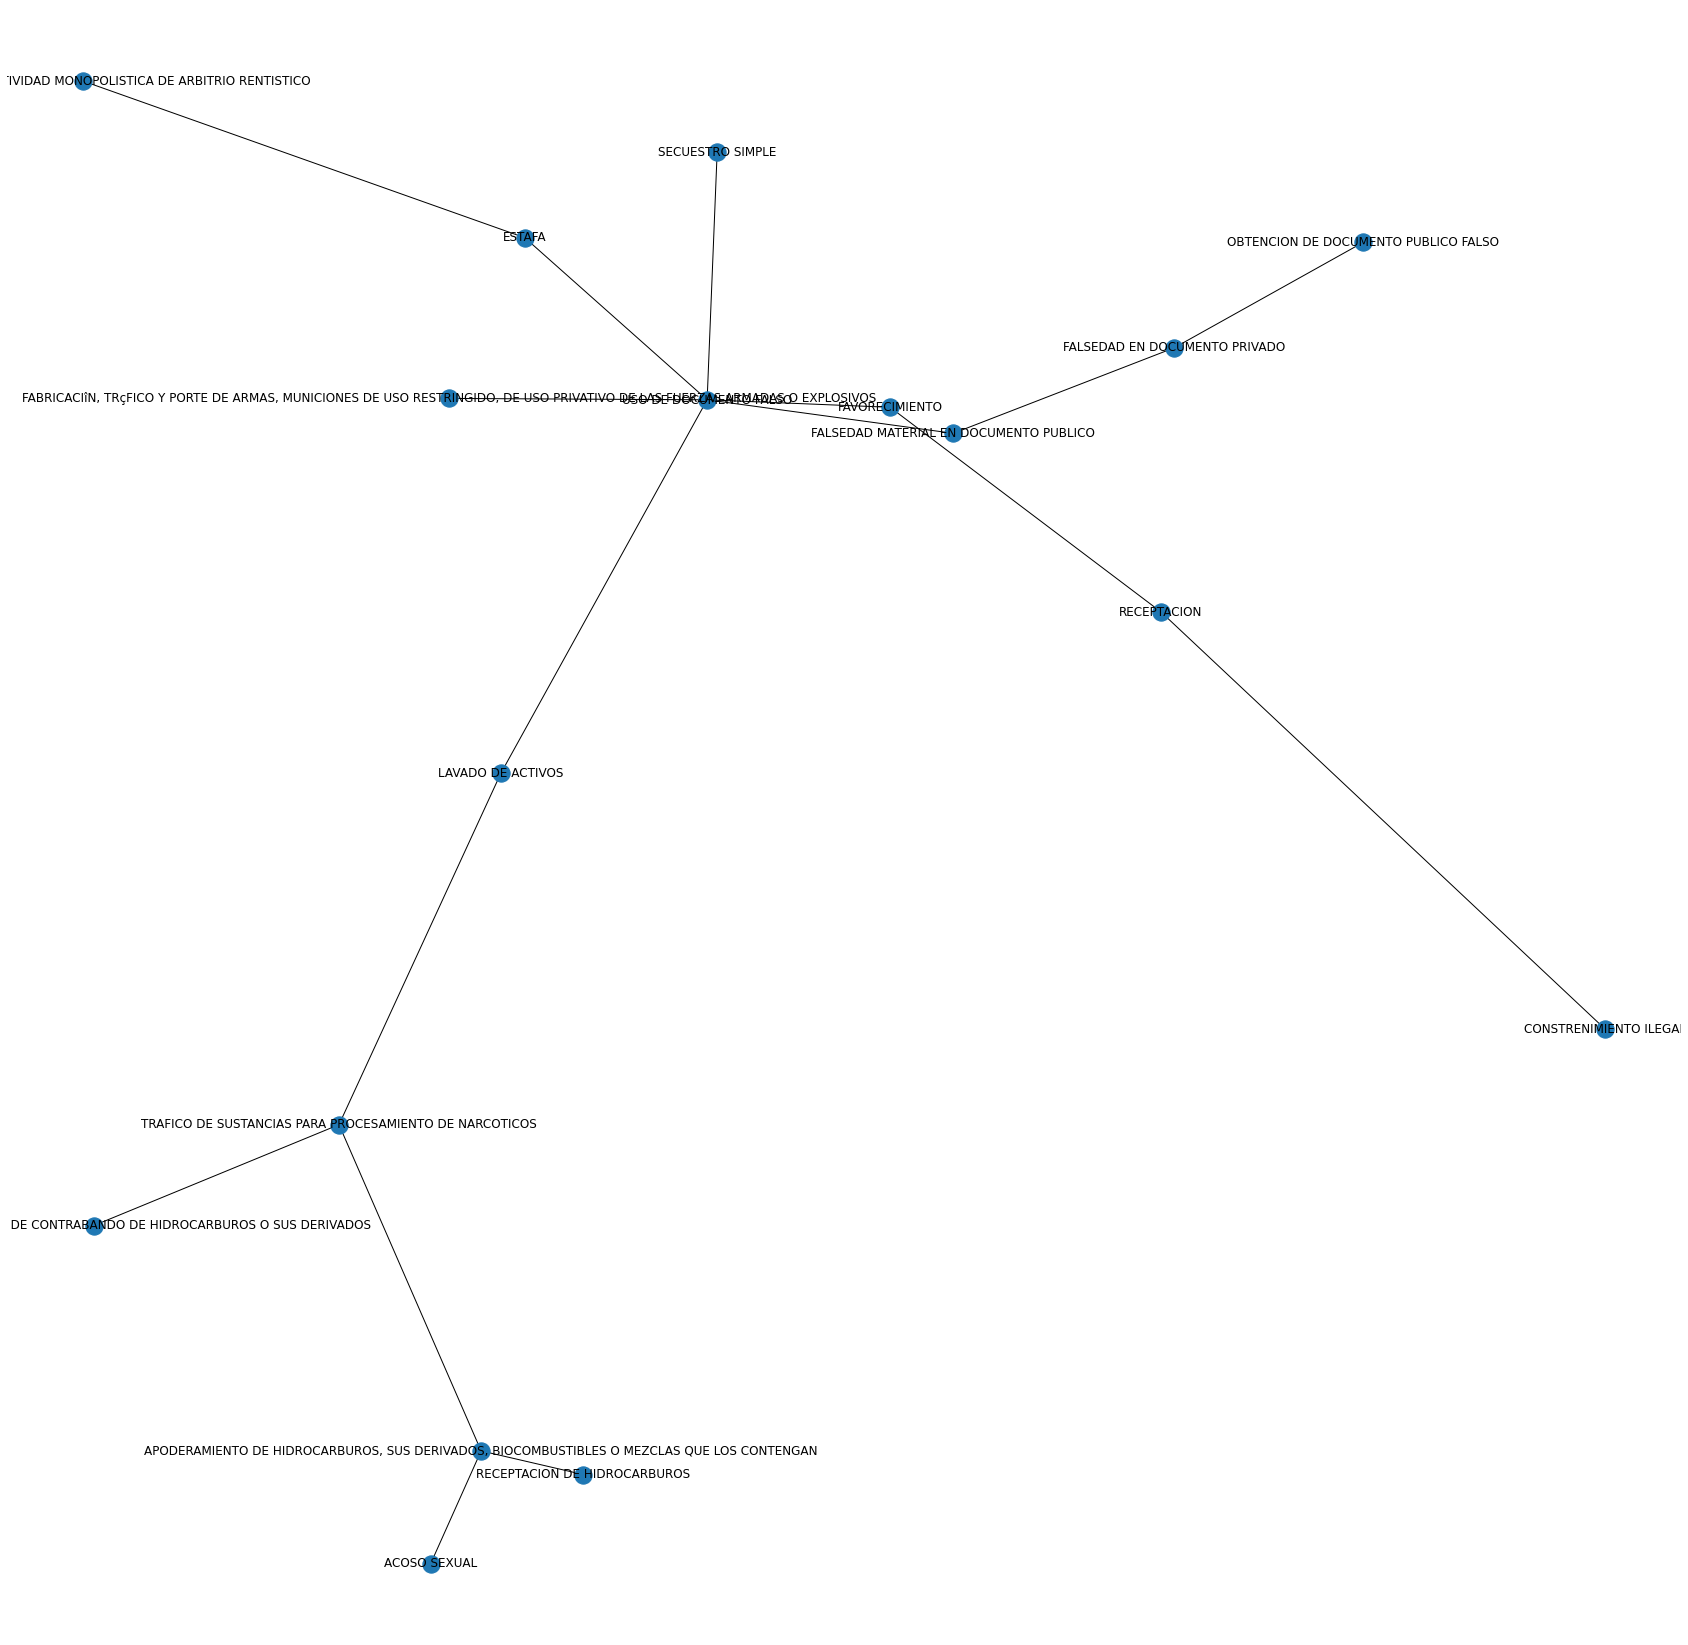

In [ ]:
community_index = 1
community = greedy_communities[community_index]
subgraph_gc = msp_graph.subgraph(community)

labels={}
for k in community:
    labels[k]=k

fig, ax = plt.subplots(figsize=(30,30))
#pos = graphviz_layout(subgraph_gc, prog='neato')
nx.draw(subgraph_gc, with_labels=True, arrows=True)
fig.show()

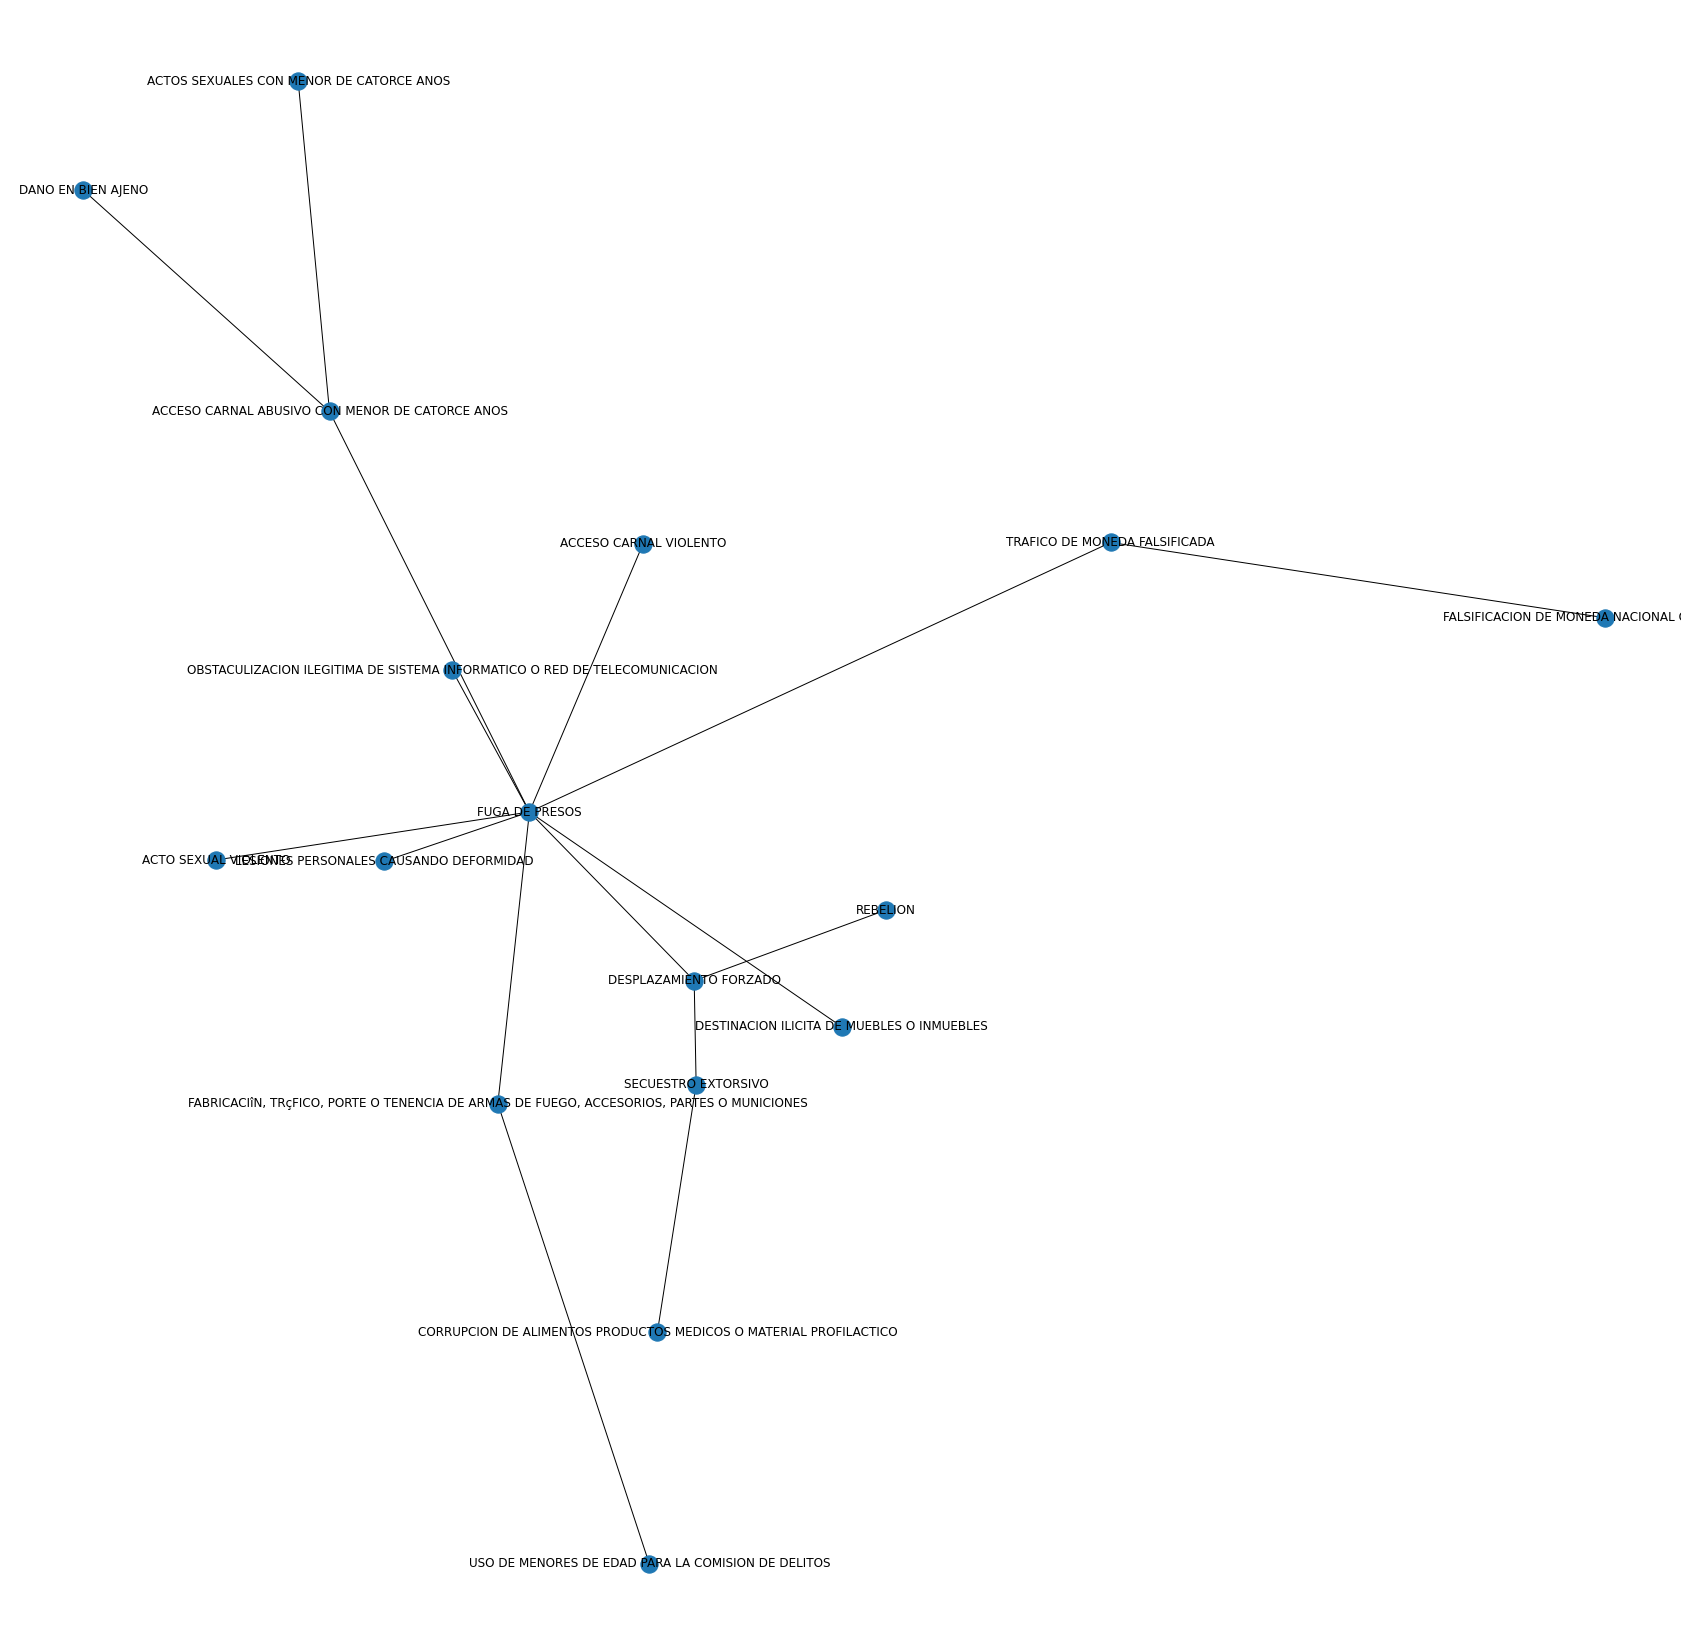

In [ ]:
community_index = 2
community = greedy_communities[community_index]
subgraph_gc = msp_graph.subgraph(community)

labels={}
for k in community:
    labels[k]=k

fig, ax = plt.subplots(figsize=(30,30))
#pos = graphviz_layout(subgraph_gc, prog='neato')
nx.draw(subgraph_gc, with_labels=True, arrows=True)
fig.show()

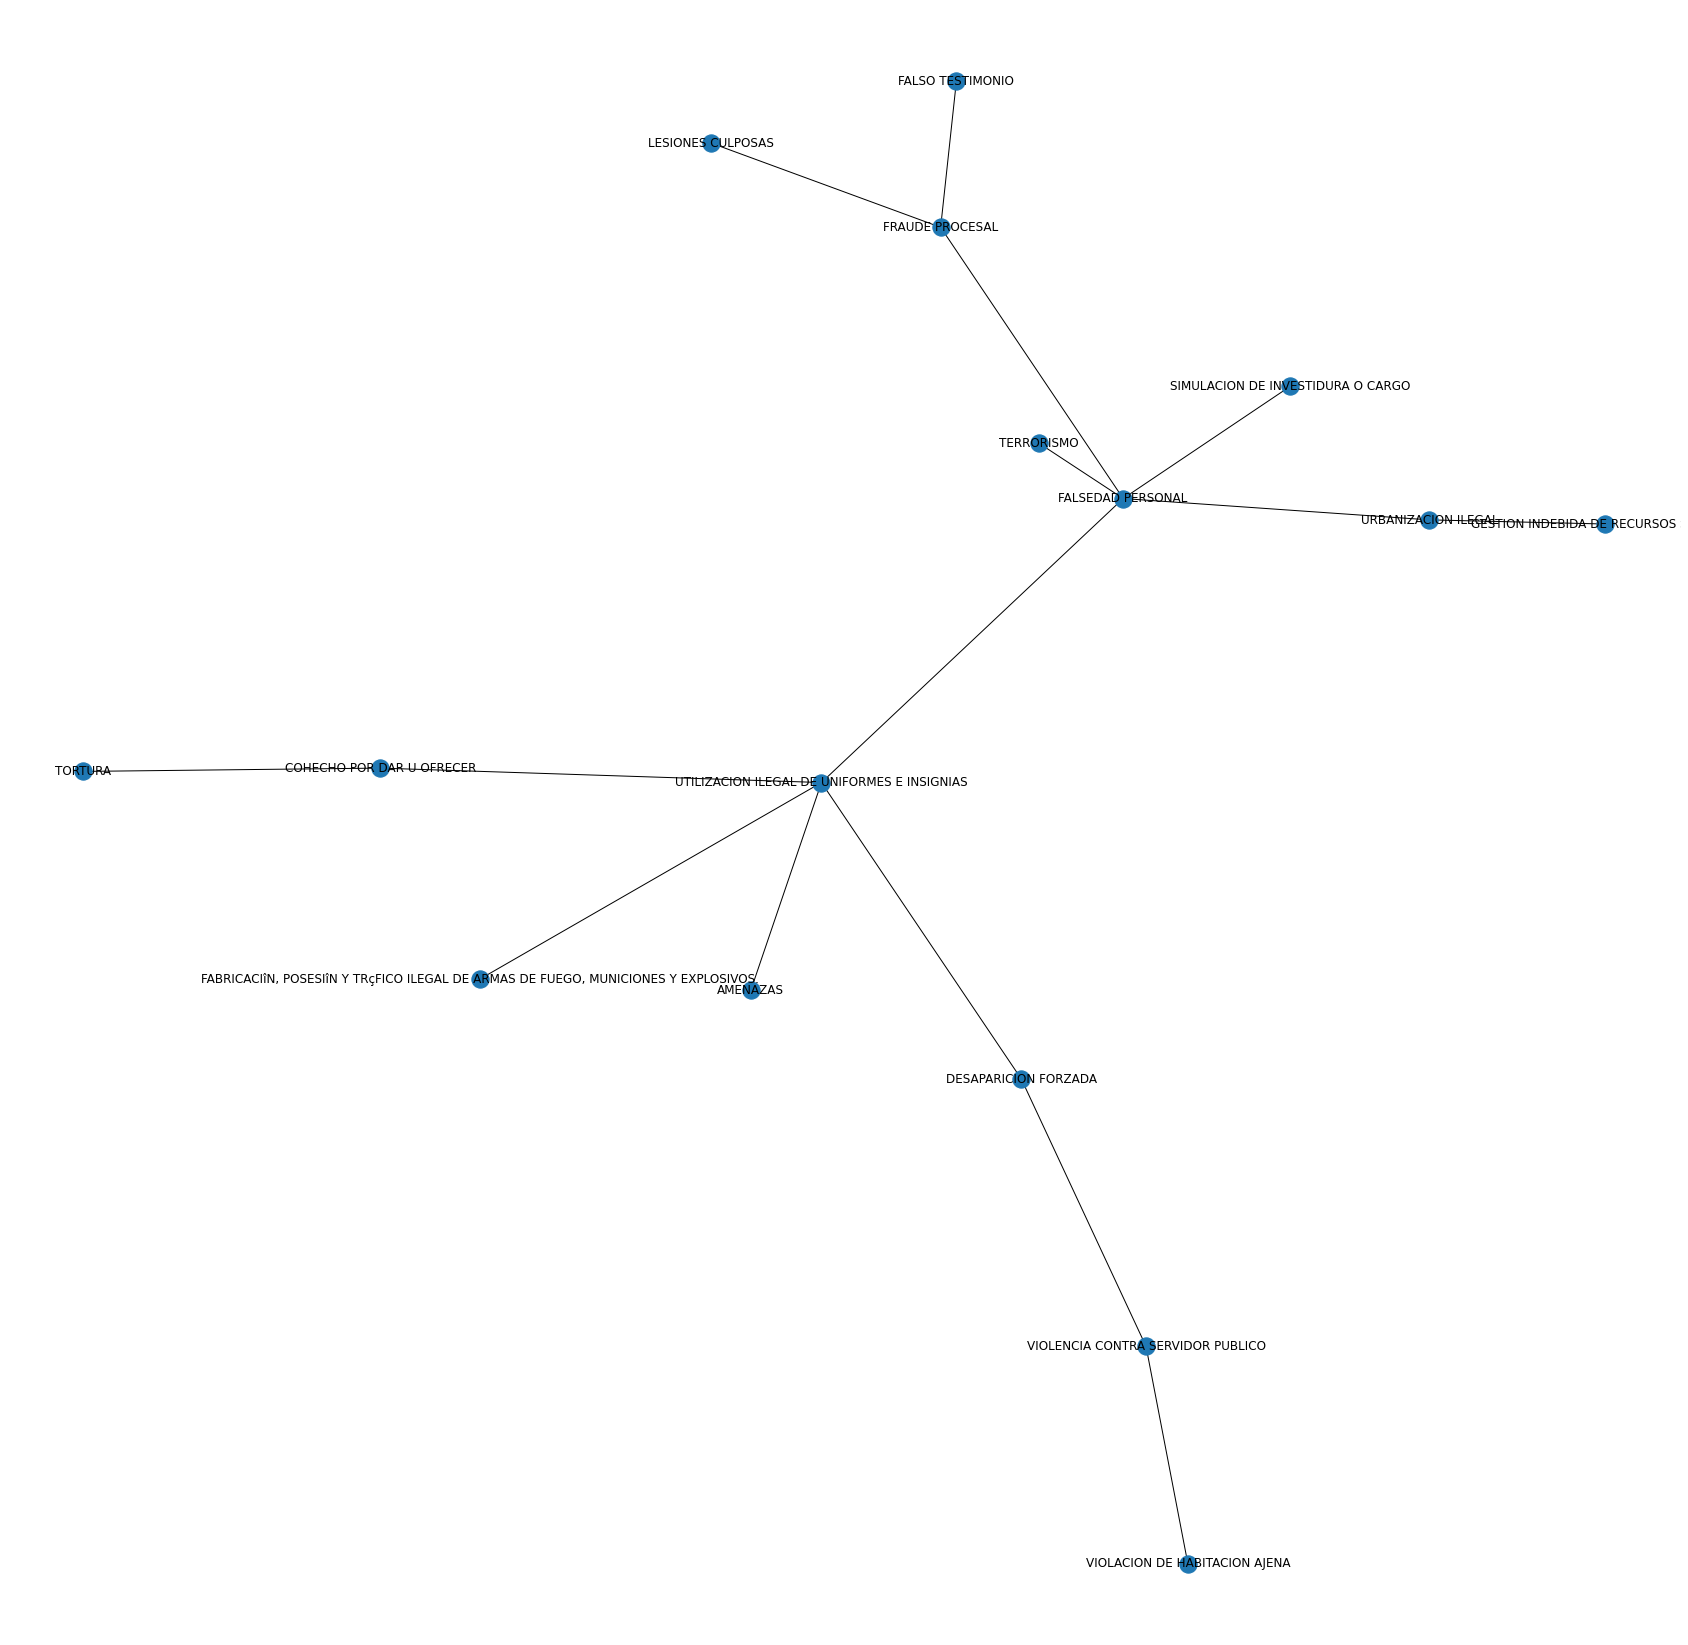

In [ ]:
community_index = 3
community = greedy_communities[community_index]
subgraph_gc = msp_graph.subgraph(community)

labels={}
for k in community:
    labels[k]=k

fig, ax = plt.subplots(figsize=(30,30))
#pos = graphviz_layout(subgraph_gc, prog='neato')
nx.draw(subgraph_gc, with_labels=True, arrows=True)
fig.show()

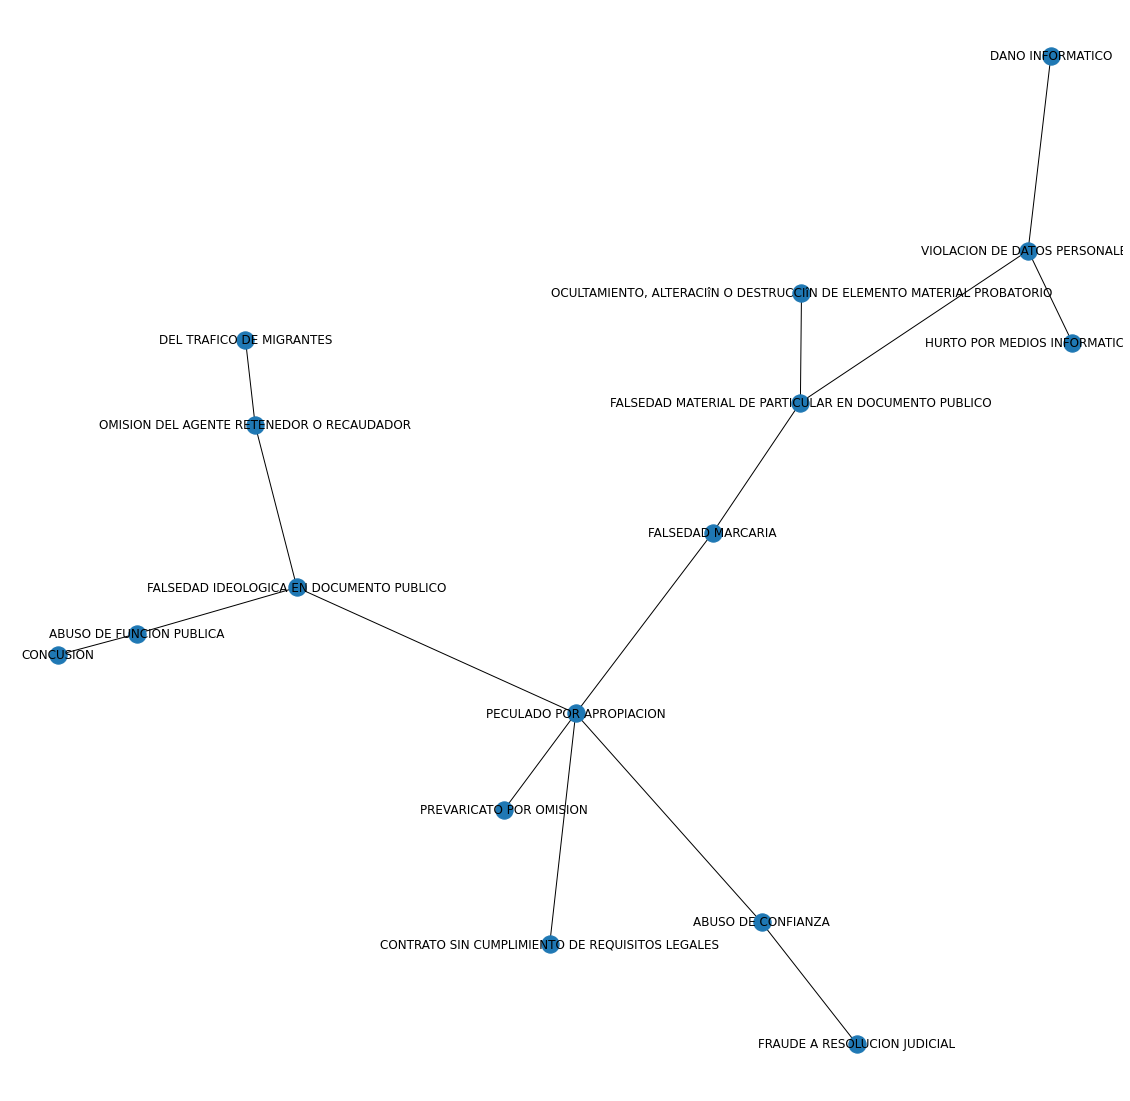

In [ ]:
community_index = 4
community = greedy_communities[community_index]
subgraph_gc = msp_graph.subgraph(community)

labels={}
for k in community:
    labels[k]=k

fig, ax = plt.subplots(figsize=(20,20))
#pos = graphviz_layout(subgraph_gc, prog='neato')
nx.draw(subgraph_gc, with_labels=True, arrows=True)
fig.show()

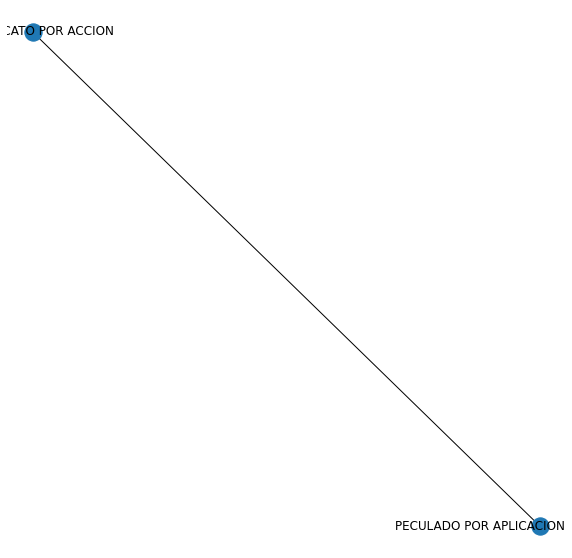

In [ ]:
community_index = 5
community = greedy_communities[community_index]
subgraph_gc = msp_graph.subgraph(community)

labels={}
for k in community:
    labels[k]=k

fig, ax = plt.subplots(figsize=(10,10))
#pos = graphviz_layout(subgraph_gc, prog='neato')
nx.draw(subgraph_gc, with_labels=True, arrows=True)
fig.show()